###### 01 머신러닝?

머신러닝 : 데이터에서 지식을 추출하는 작업.(통계적 머신러닝)

예 : 영화 추천, 음식 주문, 쇼핑, 맞춤형 방송, 미립자 발견 및 맞춤형 암 치료법 등에 사용

초창기에는 is/else를 사용하는 시스템 > 규칙 기반 전문가 시스템을 사용하는 예

> 결정 규칙을 수동으로 만들면 모델링 처리과정 또한 사람이 잘 알아야한다.
> 로직이 조금만 변경되어도 전체 시스템을 다시 개발해야 할 수도 있다.

머신러닝 알고리즘

- 1) 지도학습 : 사용자 > 알고리즘에 입력&기대 출력 제공 / 알고리즘 > 주어진 입력에서 원하는 출력 만듦.

> 학습된 알고리즘은 사람 도움 없이도 새로운 입력이 주어지면 적절한 출력함.
> - 편지 봉투에 손으로 쓴 우편번호 판별 (입력: 손글씨 스캔 이미지 / 기대출력: 우편번호 숫자) >>> 손 많이 가지만 쉽고, 비용 적게 듦.
> - 의료 영상 이미지에 기반한 종양 판단 (입력: 이미지 / 기대출력: 종양의 양성여부) >>> 고가의 장비, 전문가 의견 필요.
> - 의심되는 신용카드 거래 감지 (입력: 신용카드 거래 내역 / 기대출력: 부정 거래 여부) >>> 데이터는 있고, 기다리기만 하면.

- 2) 비지도학습 : 사용자 > 알고리즘에 입력은 주어지고&출력은 제공x >>> 비지도 학습을 이해/평가하는 건 쉽지x
    
> - 블로그 글의 주제 구분 >>> 어떤 주제/얼마나 많은 주제인지 알지 못함 (출력 갖고 있지 않은 셈)
> - 고객들을 취향이 비슷한 그룹으로 그룹화 >>> 어떤 그룹/얼마나 많은 그룹이 있는지 미리 알지 못함 (출력 갖고 있지 않은 셈)
> - 비정상적인 웹사이트 접근 탐지 >>> 단지 웹 트래픽만 관찰 & 정상/비정상 알지 못함.

- 지도학습 & 비지도학습 모두 컴퓨터가 인식 가능한 형태로 데이터를 준비해야!
- 데이터를 엑셀 테이블 처럼 생각하자!


- 행 : 개개의 데이터(이메일,고객,거래 등)
- 열 : 데이터를 구성하는 각 속성(나이, 거래 가격, 지역 등)
- 샘플/데이터 포인트 : 하나의 개체 혹은 행
- 특성 : 샘플의 속성/열
- 특성 추출/특성 공학 : 좋은 입력 데이터를 만들어내는 것

> 어떤 머신 러닝 알고리즘도 아무 정보가 없는 데이터로는 그 어떤 것도 예측 불가.

> 알고리즘 적용 전, 반드시 데이터셋으로 무엇을 해야하는지 이해해야!

> 전체 시스템에 대한 큰 그림을 알아야!

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
%pwd

'/Users/kimminkyoung/easy_p/01.exercise'

In [3]:
# scikit-learn
# 오픈 소스
# 다른 파이썬의 패키지들과도 잘 연동된다.

# numpy & scipy 사용
# Numpy
# 다차원 배열을 위한 기능&선형대수 연산&푸리에 변환 같은 고수준 수학함수와
# 유사 난수 생성기 포함
# np배열은 기본 데이터 구조 >>> scikit-learn에서
# scikit-learn은 넘파이 배열 형태의 데이터를 입력으로 받는다.
# >>> 데이터는 모두 numpy 배열로 변환되어야 한다.
import numpy as np

# 넘파이 모든 원소는 동일한 데이터 타입이어야.
x = np.array([[1,2,3], [4,5,6]])
print("x:\n", x)
print(type(x))

x:
 [[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>


In [4]:
# Scipy
# 과학 계산용 함수를 모아놓은 파이썬 패키지
# 고성능 선형대수, 함수 최적화, 신호 처리, 특수한 수함함수/통계 분포 등 제공

# scikit-learn은 scipy의 여러 함수를 사용해 알고리즘 구현
# scipy.sparse : 희소 행렬 기능 제공.
# 희소 행렬(sparse matrix) : 0을 많이 포함한 2차원 배열을 저장할 때 사용.
from scipy import sparse

eye = np.eye(4) # 정사각형 배열
# 대각선 원소 모두 1 나머지는 0

print("Numpy 배열:\n", eye)

print("="*20)

# numpy 배열 > scipy 희박행렬로 변환
# 0이 아닌 원소만 저장.
# sparse.csr_matrix()
sparse_matrix = sparse.csr_matrix(eye)
print("\nscipy의 행렬:\n", sparse_matrix)

Numpy 배열:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

scipy의 행렬:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
# 메모리 부족 때문에 희소 행렬을 직접 만들어야 한다.
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))

print("coo 표현\n",eye_coo)

coo 표현
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [6]:
# 붓꽃의 품종 종류
# 지도 학습
# 측정 데이터(setosa, versicolor, virginica)를 이용해 새로 채집한 붓꽃의 품종을 예측
# 입력: 측정 데이터, 기대 출력: 새로 채집한 붓꽃의 품종 예측

# 분류의 문제

# 클래스 : 출력될 수 있는 값(붓꽃의 종류)
# >>> 세 개의 클래스를 분류하는 문제
# >>> 데이터 포인트 하나(붓꽃)에 대한 기대 출력은 꽃의 품종
# 레이블 : 특정 데이터 포인트에 대한 출력(품종)
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print(type(iris_dataset))
# >>> bunch 클래스의 객체 : 키와 값으로 구성(딕셔너리와 유사)

# .keys()
print("iris_dataset의 키:\n",iris_dataset.keys())

<class 'sklearn.utils.Bunch'>
iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
# DESCR key
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [8]:
# target_names
# : 예측하려는 붓꽃 품종의 이름을 문자열 배열로 갖고 있다.
print("타깃의 이름:\n", iris_dataset['target_names'])
# >>> ['setosa' 'versicolor' 'virginica']

타깃의 이름:
 ['setosa' 'versicolor' 'virginica']


In [9]:
# feature_names
# : 각 특성을 설명하는 문자열 리스트
print("타깃의 이름:\n", iris_dataset['feature_names'])
# >>>  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

타깃의 이름:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
# 실제 데이터는 target & data 필드에 들어있다.
# data : 꽃잎의 길이와 폭, 꽃받침의 길이와 폭을 수치 값으로 가지고 있는 넘파이 배열.
print("data의 타입:\n", type(iris_dataset['data']))

# data 배열의 행 : 개개의 꽃
#           열 : 각 꽃에서 구한 네 개의 측정치
print("data의 크기:\n", iris_dataset['data'].shape)
# >>> (150, 4) : 150개의 붓꽃 데이터 있다.

# 샘플 : 각 아이템
# 속성 : 특성

# >>> data 배열의 크기는 샘플의 수 * 특성의 수

print("data의 처음 다섯 행:\n", iris_dataset['data'][:5])
# >>> 다섯 붓꽃의 꽃잎 폭은 모두 : 0.2cm
# 첫번째 꽃 : 가장 긴 꽃받침(5.1cm)

data의 타입:
 <class 'numpy.ndarray'>
data의 크기:
 (150, 4)
data의 처음 다섯 행:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
# target 배열 : 샘플 붓꽃의 품종을 담은 넘파이 배열
print("target의 타입:\n", type(iris_dataset['target']))

# target : 각 원소가 붓꽃 하나에 해당하는 1차원 배열
print("target의 크기:\n", iris_dataset['target'].shape)

# 붓꽃의 종류는 0~2의 정수로 기록
print("target:\n", iris_dataset['target'])
# >>> 0 : setosa
# >>> 1 : versicolor
# >>> 2 : virginica

target의 타입:
 <class 'numpy.ndarray'>
target의 크기:
 (150,)
target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
# 성과 측정
# 새 데이터에 적용 전, 진짜 잘 작동하는지 알아야 한다.
# 모델의 예측을 신뢰할 수 있는가?

# 모델을 만들 때 쓴 데이터는 평가 목적으로 사용 불가.
# 훈련 데이터를 이미 학습했기 때문에 어떤 데이터라도 정확히 예측 가능.
# 데이터를 기억한다 >>> 모델을 잘 일반화하지 못했다.

# 데이터를 훈련 데이터 / 테스트 데이터로 나누기
# train_test_split()
# >>> 보통 훈련 세트는 전체 중 75%, 테스트 데이터는 25%.

# 데이터는 대문자 X (2차원 배열,행렬)
# 레이블은 소문자 y (타깃은 1차원 배열,벡터)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

# 레이블은 순서대로 정리되었기 때문에 더욱 일반화가 잘 되도록
# 테스트 세트가 세 클래스의 데이터를 모두 포함하도록 섞자
# 유사 난수기에 넣을 난수 초깃값을 전달
# >>> 난수 사용 시 항상 random_state 고정 > 코드는 항상 같은 결과 출력
# >>> X-train : 75%, X-test : 25%

print("X_train의 크기:", X_train.shape)
print("y_train의 크기:", y_train.shape)
print("X_test의 크기:", X_test.shape)
print("y_test의 크기:", y_test.shape)

X_train의 크기: (112, 4)
y_train의 크기: (112,)
X_test의 크기: (38, 4)
y_test의 크기: (38,)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

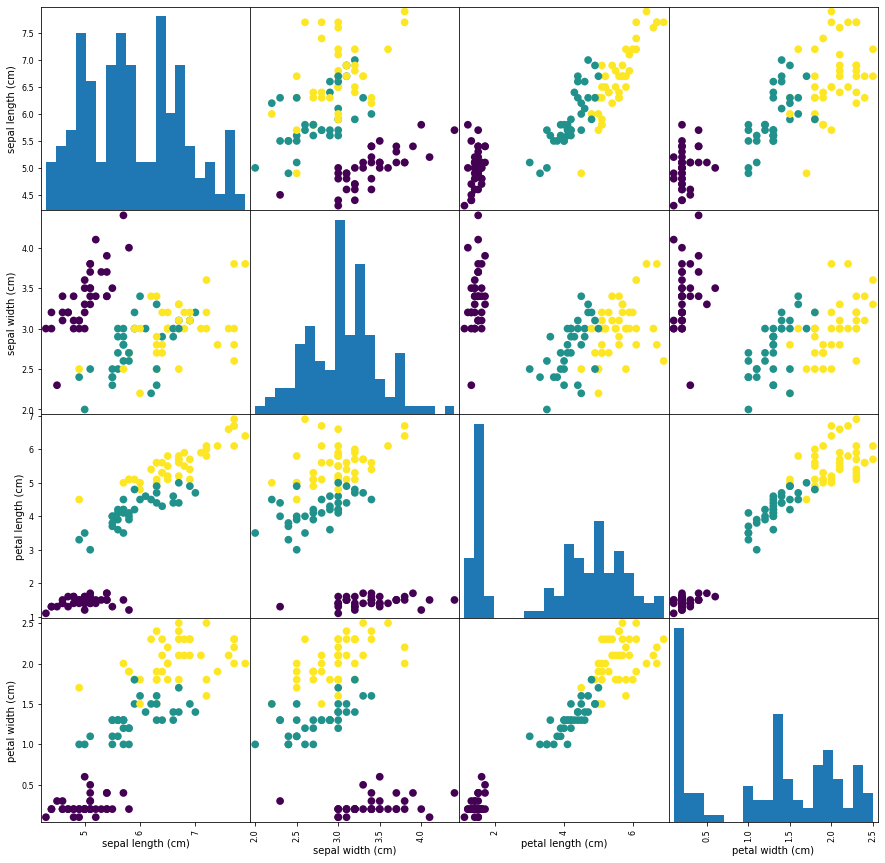

In [13]:
# 데이터 살펴보기에 가장 좋은 방법 : 시각화
# 산점도
# scatter plot
# 산점도 행렬 : 특성의 수가 적을 때 괜찮은 방법.
# >>> 한 그래프에 모든 특성의 관계가 나타나는 것은 아니다. : 드러나지 않는 중요한 성질이 있을수도.

# 훈련세트(training set)를 사용해 만든 4개 특성에 대한 산점도 행렬.
# 색깔은 품종에 따라 구분.
# 가장 짙은 색 : setosa
# 중간 색 : versicolor
# 가장 밝은 색 : virginica

# Numpy 배열 > pandas의 DataFrame으로 변환
import pandas as pd

iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                          hist_kwds={'bins':20}, s=60, alpha=8)
# >>> 대각선은 각 특성의 히스토그램
# >>> 나름 잘 구분된다!

In [14]:
# k-최근접 이웃
# 단순히 훈련 데이터를 저장해서 만들어진다.
# 새로운 데이터 포인트에 대한 예측 필요 > 새 데이터 포인트에서 가장 가까운 훈련 데이터 포인트 찾는다.
# > 훈련 데이터의 레이플을 새 데이터 포인트의 레이블로 지정.

# k개의 가까운 이웃을 찾는다. (훈련 데이터 내에서)
# 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 사용.

# neighbors 모듈 하위 클래스 KNeighborsClassifier에 구현.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# n_neighbors : 이웃의 수
# knn 객체 : 훈련 데이터로 모델을 만듦 & 새 데이터 포인트에 대해 예측 알고리즘을 캡슐화.

# 모델 만들기
# fit()
# fit() 은 knn 객체를 메서드로 반환. (+ 객체 자체를 변경시킴.)
knn.fit(X_train, y_train)
# knn 객체가 문자열로 출력.

KNeighborsClassifier(n_neighbors=1)

In [15]:
# 예측
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape
# 꽃받침 : 5
# 폭 : 2.9
# 길이 : 1
# 폭 : 0.2
# (1,4) >>> 1: 샘플의수, 4: 특성의 수

(1, 4)

In [16]:
# predict()
prediction = knn.predict(X_new)
print("예측:", prediction)
print("예측한 타깃 이름:", iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃 이름: ['setosa']


In [17]:
# 모델 평가
# 테스트 세트 사용
# 모델 만들때 사용안한 데이터

# 정확도로 모델의 성능을 평가
# np.mean()
y_pred = knn.predict(X_test)
print("test set 에 대한 예측값:\n", y_pred)
print("test set 정확도: {}".format(np.mean(y_pred == y_test)))
print("test set 정확도: {:.2f}".format(np.mean(y_pred == y_test))) # 소수 둘째자리까지 표현.

test set 에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
test set 정확도: 0.9736842105263158
test set 정확도: 0.97


In [18]:
# knn.score()
print("test set 정확도: {:.2f}".format(knn.score(X_test, y_test)))
# >>> 97% 의 정확도로 맞혔다!
# 이 정도는 충분히 신뢰할만 하다.

test set 정확도: 0.97


In [19]:
# fit, predict, score() >>> 지도 학습 모델의 공통 인터페이스

###### 02 지도 학습

입력과 출력 샘플 데이터가 있다.

주어진 입력으로부터 기대출력을 예측하고자 할 때 사용.

> 1) 분류(출력 값에 연속성x)

>- 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측
>- 웹사이트가 어떤 언어로 되어 있는가?
>> - 이진 분류(딱 두개의 클래스로 분류)
>> -- 예/아니오 (양성 클래스/음성 클래스)
>> - 다중 분류(셋 이상의 클래스로 분류)

> 2) 회기(출력 값에 연속성o)

>- 연속적인 숫자, 또는 부동소수점수(실수)를 예측하는 것
>- 연소득 출력

- 일반화

> 모델이 처음보는 데이터에 대해 정확하게 예측한다. -> 훈련 세트에서 테스트 세트로 일반화 되었다.

> 주의, 아주 복잡한 모델을 만들면 훈련세트에만 정확한 모델이 될 수 있다.(과대적합)

- 과대적합

> 가진 정보를 모두 모두! 사용해서 너무 복잡한 모델을 만드는 것.

> 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 발생.

> 모델이 too much 복잡 -> 데이터 포인트에 너무 민감 -> 일반화x

- 과소적합
> 너무 간단한 모델이 선택되는 것

# 우리는 일반화 성능이 최대가 되는 최적점에 있는 모델을 찾는다!

In [20]:
# 최근접 이웃
# : 작은 데이터셋. 기본 모델. 설명 쉽.

# 선형 모델
# : 첫번째 시도 알고리즘. 대용량 데이터셋 가능. 고차원 데이터.

# 나이브 베이즈
# : 분류만 가능. 선형모델 보다 훨씬 빠름(but, 덜 정확). 대용량 데이터셋. 고차원 데이터.


# 결정 트리
# : 매우 빠름. 데이터 스케일 조정 필요 없. 시각화&설명 쉽.

# 랜덤 포레스트
# : 결정 트리 1보다 항상 좋은 성능. 매우 안정적&강력. 데이터 스케일 조정 필요 없. 고차원 희소데이터x

# 그레이디언트 부스팅 결정 트리
# : 랜포 보다 좀 더 성능 좋. 랜포보다 학습은 느림 & 예측은 빠름 & 튜닝 많이 필요. 메모리 조금 사용.


# 서포트 벡터 머신 
# : 비슷한 특성의 중간 규모 데이터셋. 데이터 스케일 조정 필요. 매개변수에 민감.

# 신경망
# : 특히 대용량 데이터셋에서 매우 복잡 모델 가능. 매개변수 선택/데이터 스케일에 민감. 큰 모델은 학습이 너무 오래 걸림.

# >>> 새로운 데이터셋 작업 시 : 간단 모델 시작(최근접 이웃 분류기) -> 성능 가늠 -> 데이터 충분히 이해 -> 복잡 모델 알고리즘 고려.


X.shape: (100, 2)


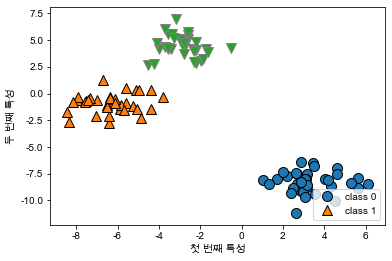

In [21]:
# forge 데이터셋
# : 인위적으로 만든 이진 분류 데이터셋
# x 축 : 첫번째 특성
# y 축 : 두번째 특성

# 산점도
# 점 하나 : 각 데이터 포인트
# 점의 색&모양 : 클래스
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs
# warning 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
matplotlib.rcParams['axes.unicode_minus'] = False
# 한글 폰트 지정 후 그래프에서 마이너스 폰트 깨지는 문제 해결

# X, y = mglearn.datasets.make_forge() 
X, y = make_blobs()
# >>> make_forge() 에러 해결.

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

print("X.shape:", X.shape)
# >>> 데이터 포인트: 26개, 특성: 2개

Text(0, 0.5, '타깃')

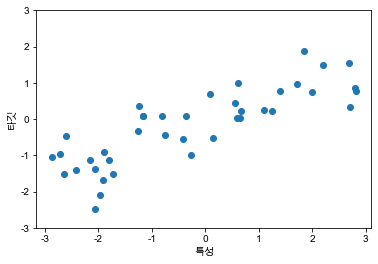

In [22]:
# 인위적으로 만든 wave 데이터 셋
# 입력 특성 하나, 모델링할 타깃 변수(응답) 가진다.
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('특성')
plt.ylabel('타깃')

# + 특성이 적은 저차원 데이터셋에서 얻은 직관이 특성이 많은 고차원 데이터셋에서 그대로 유지되지 않을 수 있다.

In [23]:
# scikit-learn에 들어있는 실제 데이터셋 
# 위스콘신 유방암 데이터셋 (cancer) : 유방암 종양의 임상 데이터를 기록해 놓은 것
# 각 종양은 양성/악성으로 레이블
# 종양이 악성인지? 예측하는 것이 과제
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer.keys():\n", cancer.keys())

print("유방암 데이터의 형태:", cancer.data.shape) 
# (569, 30) >>> 569 데이터셋, 30개 특성

print("클래스별 샘플 개수:\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

# feature_names
# 각 특성의 의미 출력
print("특성 이름:\n", cancer.feature_names)

# DESCR : 데이터에 관한 자세한 정보
print(cancer.DESCR)

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태: (569, 30)
클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}
특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

 

In [24]:
# 보스턴 주택가격 데이터셋
# 범죄율, 찰스강 인접도, 고속도로 접근성 등을 이용해 1970년대 보스턴 주변의 주택 평균 가격 예측

# 데이터셋명.data.shape
# 데이터 포인트 506개, 특성 13개
from sklearn.datasets import load_boston
boston = load_boston()
print("data 형태:\n", boston.data.shape)

data 형태:
 (506, 13)


In [25]:
# 특성끼리 곱해서 의도적으로 확장
# 특성 공학 : 특성을 유도해내는 것
# load_extended_boston()
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)
# (506, 13) >>> (506, 104) 특성 확장

X.shape: (506, 104)


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


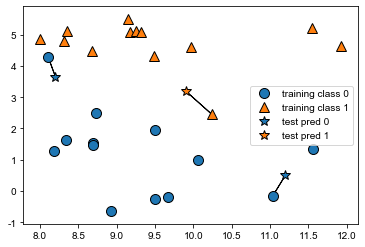

In [26]:
# k-최근접 이웃
# k-NN (k-Nearest Neighbors) 알고리즘 : 가장 간단한 ml algorithm
# train 데이터셋을 그냥 저장하는 것이 전부!
# 훈련 데이터셋에서 가장 가까운 데이터 포인트(최근접 이웃) 찾기가 예측!

# 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용
# n_neighbors

mglearn.plots.plot_knn_classification(n_neighbors=1)


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


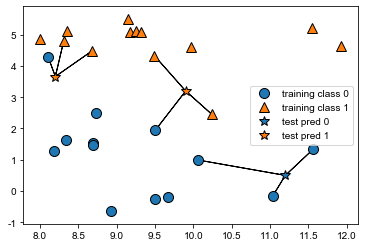

In [27]:
# 임의의 k개 여러개 설정 가능.
# 둘 이상의 레이블 선택 시
# : 테스트 포인트 하나에 대해 클래스 0에 속한 이웃 몇 개?
#   클래스 1에 속한 이웃이 몇 개?
#   >>> 이웃이 더 많은 클래스를 레이블로 지정.
# >>> k-최근접 이웃 중 다수의 클래스가 레이블이 된다.
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [28]:
# 일반화 성능 평가
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 쉐킷 쉐킷!

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) # 이웃 : 3

In [30]:
# 훈련 세트를 이용해서 분류 모델 학습시키기
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# 예측하기
# predict() 메서드 호출해서 예측.
# 가장 가까운 이웃을 계산해서 가장 많은 클래스를 찾는다.
print("테스트 세트 예측:\n", clf.predict(X_test))

테스트 세트 예측:
 [1 0 1 0 1 0 0]


In [32]:
# 얼마나 잘 일반화?
# 성능 테스트
# 정확도?
# score()
print("테스트 세트 정확도 {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 0.86


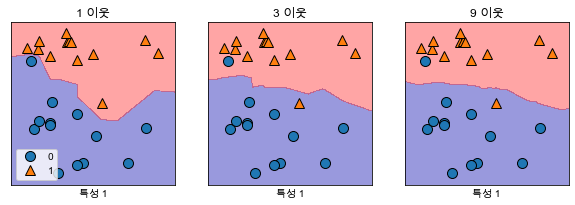

In [33]:
# 결정 경계
# : 알고리즘이 지정한 영역으로 나뉘는 것
# 2차원 데이터셋이기 때문에 가능한 모든 예측을 평면에 그려보자
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_xlabel("특성 1")
axes[0].legend(loc=3)
# >>> 이웃이 많아질수록 결정 경계가 더 부드러워진다.
# >>> 부드러운 경계 : 더 단순한 모델
# 이웃을 적게 사용하면 > 모델 복잡도가 높아진다.


In [34]:
# + 훈련 데이터 전체를 이웃의 수로 지정하는 극단적인 경우
# : 예측은 모두 같은 값

# >>> 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스 > 예측값

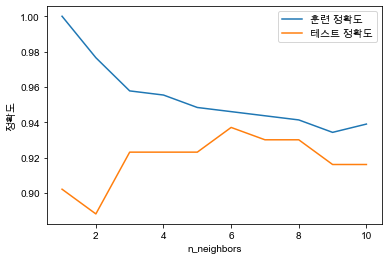

In [35]:
### 복잡도와 일반화 사이의 관계 입증해보기
# 유방암 데이터셋 사용
from sklearn.datasets import load_breast_cancer

# dataset 준비
cancer = load_breast_cancer()

# 훈련 세트 / 테스트 세트 나누기
# train_test_split()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# 빈 리스트로 초기화
training_accuracy = []
test_accuracy = []

# n_neighbors를 1~10까지 적용
neighbors_settings = range(1,11)

# 모델 생성, 훈련세트 정확도 저장, 일반화 정확도 저장 for문
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# >>> n_neibors에 따른 테스트세트 정확도 보여주는 그래프 생성
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

# >>> 이웃이 1일때, 훈련 데이터에 대한 예측 완벽!
# >>> but, 이웃 늘어날수록 정확도 다운 (모델 단순해 짐)
# >>> 1-최근접 이웃이 모델을 너무 복잡하게 만든다.
# >>> 하지만 이웃을 10개 사용하면 모델이 너무 '단순'해져서 정확도는 더 나빠짐.

# >>> 정확도가 최적 : 중간 정도인 이웃 6개.

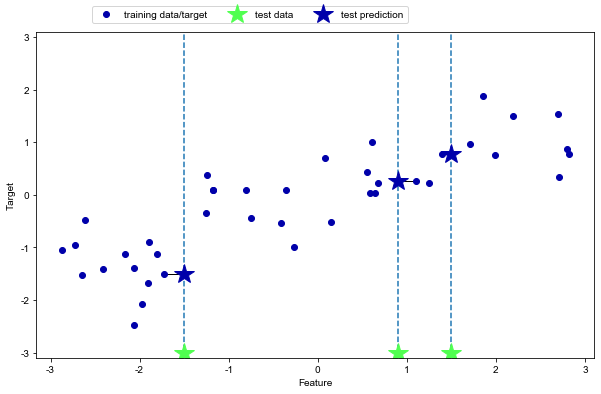

In [36]:
# k-최근접 이웃 <회귀>
# wave 데이터셋 사용
mglearn.plots.plot_knn_regression(n_neighbors=1)

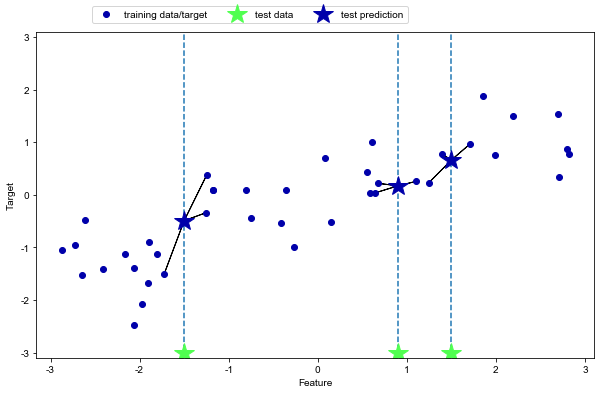

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# >>> 이웃 여러개 사용시 이웃 간의 평균이 예측.

In [38]:
# 회귀를 위한 k-최근접 이웃 알고리즘
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [39]:
# 예측
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [40]:
# score() 사용해서 모델 평가

# 결정 계수 : 회귀모델에서 예측의 적합도를 측정한 것(R^2)
#           0~1 사이의 값.
# 1 : 예측이 완벽한 경우
# 0 : 훈련 세트의 출력값인 y_train 평균으로만 예측하는 모델
# R^2은 음수가 될 수도 있다. (예측과 타깃이 상반된 경항을 보일 때)
print("테스트 세트 결정계수R^2: {:.2f}".format(reg.score(X_test, y_test)))


테스트 세트 결정계수R^2: 0.83


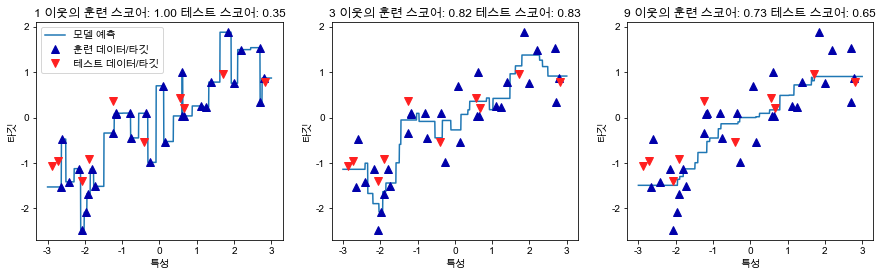

In [41]:
# 이웃수에 따른 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

# >>> 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만, 더 안정된 예측(더 잘 분리된 모습)을 얻게 된다.

In [42]:
# KNeighbors 분류기에 중요한 매개변수 : 두 개
# 1) 데이터 포인트 사이의 거리를 재는 방법
# 2) 이웃의 수
# 실제로 이웃의 수는 3~5개 정도로 작을 때 잘 작동하지만, 잘 조정해야!
# >>> 유클리디안 거리 방식을 사용

# k-NN 은 매우 이해가 쉬운 모델.
# 복잡한 알고리즘을 적용하기 전에 시도할 수 있는 좋은 시작점!
# 얘는^ 빠르게 만들 수 있지만, 훈련 세트가 매우 크면 예측이 느려진다.
# 수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 작동x
# 특성 값 대부분이 0인 희소데이터셋과는 특히 잘 작동x!

# >>> 이해하기 쉽지만, 예측이 느리고 많은 특성을 처리하는 게 힘들어 현업에서는 잘 사용x.
# >>> 위의 단점이 없는 알고리즘 : 선형 모델

w[0]: 0.393906  b: -0.031804


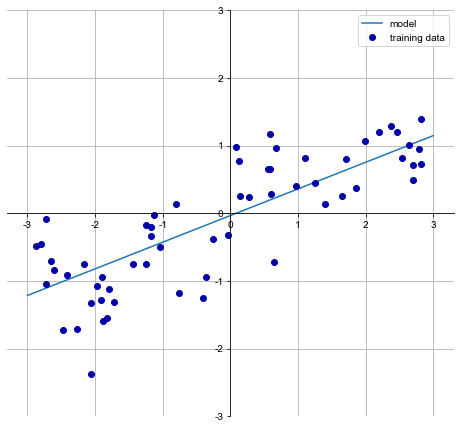

In [43]:
# 선형 모델
# 100년 전에 개발됐지만 현재에도 많이 쓰인다.
# 선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행.
# 예측값 : 입력 특성에 w의 가중치(음수도 가능)를 곱해서 더한 가중치의 합
mglearn.plots.plot_linear_regression_wave()

# 회귀를 위한 선형 모델, 
# 특성 1 -> 직선 / 특성 두 개 -> 평면, 더 많은 특성(더 높은 차원) -> 초평면

# >>> 직선을 사용한 예측이 더 제약이 많아 보임.
# >>> 특성이 많은 데이터셋에서는 선형 모델은 매우 훌륭한 성능
# >>> 특히, 훈련데이터 < 특성 인 경우. 완벽하게 훈련 세트에 대해서 선형 함수로 모델링 가능.

In [44]:
# 회귀에서 가장 인기있는 선형 모델들

# 선형 회귀(최소제곱법)
# 리지 회귀
# 라소 (리지의 대안)
# 분류용 선형 모델 / 다중 클래스 분류용 선형 모델

In [45]:
# 선형 회귀(최소제곱법)
# 가장 간단하고 오래된 회귀용 선형 알고리즘
# : 예측과 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터를 찾는다.
# 평균제곱오차 : 예측값과 타깃값의 차이를 제곱하여 더한 수, 샘플의 개수로 나눈 것
#  >>> 매개변수가 없는 것이 장점, but 모델의 복잡도를 제어할 방법도 x
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [46]:
# 기울기 파라미터(w) : 가중치/계수
# : lr 객체의 coef_ 속성에 저장됨
# 편향/절편 파라미터(b) : intercept_ 속성에 저장.
print("lr.coef_:", lr.coef_) # 가중치/계수 (각 입력 특성에 하나씩 대응되는 넘파이 배열)
print("lr.intercept_:", lr.intercept_) # 편향/절편 (항상 실수값 하나.)

# 변수 뒤의 밑줄(_) : sckit-learn은 훈련 데이터에서 유도된 속성에 항상 끝에 밑줄을 붙임.
# >>> 사용자 지정 매개변수와 구분하기 위해.

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


In [47]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("test 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# >>> R^2 값이 0.66인 것은 별로 좋은 결과는 아니다.
# >>> 훈련 세트 점수와 테스트 세트 점수가 매우 비슷 > 과소적합
# 모델이 매우 단순

훈련 세트 점수: 0.67
test 세트 점수: 0.66


In [48]:
# 고차원 데이터셋에서 과대적합 보기
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))
# >>> 훈련 세트점수와 테스트 세트 점수의 차이 > 과대적합

# >>> 복잡도를 제어할 수 있는 모델이 필요 > 리지회귀

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [49]:
# 리지 회귀(Ridge)
# : 회귀를 위한 선형 모델
# 리지회귀에서의 가중치(w) 선택 > 추가 제약 조건을 만족시키기 위한 목적도 있.
# (가중치의 절댓값을 가능한 작게 만드는 것)
# (w의 모든 원소가 0에 가깝게 되길.)
# >>> 모든 특성이 출력에 주는 영향을 최소한을 만드는 것.
# >>> 기울기를 작게 만드는 것.

# 규제
# : 과대적합이 되지 않도록 모델을 강제로 제한한다.

# 리지 회귀는 L2 규제 사용.
# linear_model.Ridge
# 리지 회귀가 확장된 보스턴 주택가격 데이터셋
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train))) # LinearRegression보다 낮
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test))) # LinearRegression보다 높
# >>> 선형 회귀보다 과대적합이 적어짐.
# >>> 덜 자유로운 모델이기 때문.(모델 제한)

# >>> 훈련 세트가 아니라 테스트 세트 점수에 관심 있기 때문에,
# >>> 테스트 정확도가 더 높은 리지 회귀 모델을 선택해야 한다.

# alpha 매개변수
# : 훈련 세트의 성능 대비 모델을 얼마나 단순화 할건지!
#   이 값은 사용하는 데이터셋에 달렸다.
# >>> alpha 값을 높 > 계수를 0에 더 가깝게 > 훈련 세트 성능 나빠짐 but, 일반화에는 도움 됨.
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75
훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [50]:
# 아주 작은 alpha 값 : 계수 거의 제한 x. >>> LinearRegression과 거의 같아짐.
ridge01 = Ridge(alpha=1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


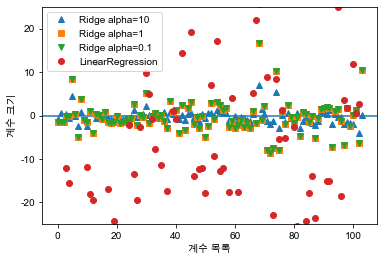

In [51]:
# alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는가? 
# 가중치/계수
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

# >>> alpha=0.1 일 때는 계수가 너무 커져 아무 규제가 없는 것은 그림 밖으로 넘어감

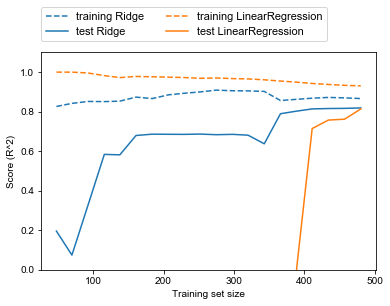

In [52]:
# 규제의 효과 이해하기
# alpha 값 고정, 훈련 데이터의 크기 변화시키기
# 학습 곡선 : 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프
mglearn.plots.plot_ridge_n_samples()

# >>> 모든 데이터셋에 대해, 리지&선형회귀 모두 훈련세트점수 > 테스트세트점수
# >>> 리지에는 규제 적용. -> 리지의 훈련 점수 < 선형회귀의 훈련 점수
# >>> 데이터가 많아질수록 성능이 좋아지고, 마지막에는 선형회귀가 리지를 따라잡는다.
#     데이터를 충분히 주면 규제는 덜 중요해져서 > 성능이 같아질 것.
# 선형 회귀의 훈련 데이터 성능이 점차 감소 -> 데이터가 많아질수록 과대적합하기 어려워지기 때문.

In [53]:
# 라소(Lasso)
# : Ridge의 대안
#   라소도 계수를 0에 가깝게 만드려고 함.
#   but, L1 규제 >>> 어떤 계수는 정말로 0이 된다. (완전히 제외되는 특성이 생긴다.)
# >>> 특성 선택이 자동으로 이뤄진다는 의미.
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso.coef_ != 0))
# >>> 결과가 모두 비슷하게 안 좋! > 과소적합
# 104 개의 특성 중 4개만 사용함.
# 라소도 alpha 매개변수 지원.


훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수:  4


In [54]:
# 과소적합을 줄이기 위해 알파 값을 줄이자
# "max_iter" : 기본 값을 증가시키지 않으면 max_iter warning 발생
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso001.coef_ != 0))

# >>> 모델의 복잡도 증가 > 성능 좋아짐.
# >>> but, 사용한 특성의 개수가 33개 뿐. (모델 분석이 더 쉽다.)


훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수:  33


In [55]:
# but, alpha 값을 너무 낮 > 규제 효과 없어져 > 과대적합 >>> LinearRegression과 비슷
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: ", np.sum(lasso00001.coef_ != 0))


훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수:  96


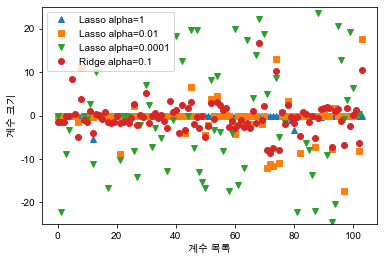

In [56]:
# alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는가? 
# 가중치/계수

plt.plot(lasso.coef_, '^', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend()

# >>> 보통 리지 회귀를 더 선호.
# >>> but, 특성이 많고 그 중 일부만 중요하면 Lasso가 더 좋은 선택

# >>> 두 패널티 결합한 ElasticNet : 최상의 성능 but, L1, L2 규제를 위해 매개변수 두 개 조정해야.

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


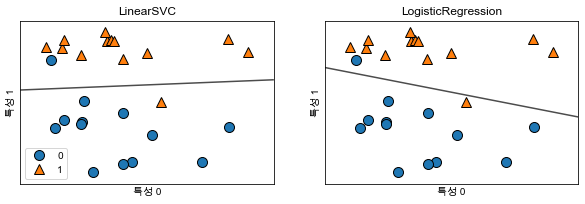

In [57]:
# 분류용 선형 모델
# 선형 모델은 분류에서도 많이 사용됨.

# 이진 분류
# 가중치 합을 그냥 사용하지 않고, 예측한 값을 임계치 0과 비교.
# -1 : 함수에서 계산한 값이 0보다 작으면 클래스 -1
# +1 : 함수에서 계산한 값이 0보다 크면 클래스 +1

# 분류용 선형 모델에서는 결정 경계가 입력의 선형함수.
# (회귀용 선형 모델에서는 출력이 특성의 선형함수.)

# 선형 분류기 : 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기

# 널리 알려진 선형 분류 알고리즘
# 1) 로지스틱 회귀(이름에 로지스틱(회귀)이 들어가지만 분류!) >>> 혼동 금지
# 2) 서포트 벡터 머신(SVC : support vector clssifier)
# forge 데이터셋 사용
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0],X[:, 1], y, ax=ax)
    
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

# >>> 위쪽이 클래스1, 아래쪽이 클래스0
# >>> 새로운 데이터가 위쪽에 놓이면 클래스1로 분류, 아래쪽이면 클래스0으로 분류.
# >>> 포인트 두 개를 잘못 분류함.

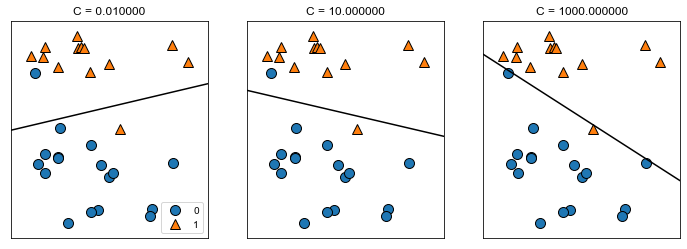

In [58]:
# C의 값이 낮아지면, 데이터 포인트 중 다수에 맞추려고 하고
# 값을 높이면, 개개의 데이터 포인트를 정확히 분류하려고 노력.
mglearn.plots.plot_linear_svc_regularization()

# >>> 왼 : 아주 작은 c 값 때문에 규제가 많이 적용.
# >>> 규제가 강해진 모델은 비교적 수평에 가깝게 결정 경계를 만듦.
# >>> 잘못 분류 : 2 개

# >>> 중간 : c값이 좀 더 크고, 잘못 분류한 샘플 두 개에 민감해져서 결정경계가 더 기울.

# >>> 오 : c값을 아주 크게 했더니, 마침내 모든 데이터를 올바로 분류함.
# >>> 단, 해당 데이터셋의 모든 데이터를 직선으로 완전 분류를 못해서 여전히 1개는 잘못 분류
# >>> 모든 데이터를 정확히 분류하려다 보니, 클래스 전체적인 배치가 무너짐 >>>과대적합

In [59]:
# 고차원에서는 분류에 대한 선형 모델이 매우 강력해지고,
# 특성이 많아질수록 과대적합 되지 않도록 조심하자.
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))
# >>> 훈련/테스트 점수가 비슷 >>> 과소적합

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [60]:
# 제약을 더 풀어줘서 > 모델을 조금 더 복잡하게 해서 > 일반화가 더 잘 적용되게 하자
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))
# >>> 조금씩 높아졌고, 복잡도가 높은 모델일수록 성능이 좋다는 것을 입증

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [61]:
# 규제를 훨씬 강하게!
# c=0.01
logreg001 = LogisticRegression(C=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))
# >>> 점수가 왜 안 높아짐?
# >>> 이미 과소적합된 모델에서 왼쪽으로 더 이동하게 돼서, 기본 매개변수보다 낮아짐.

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


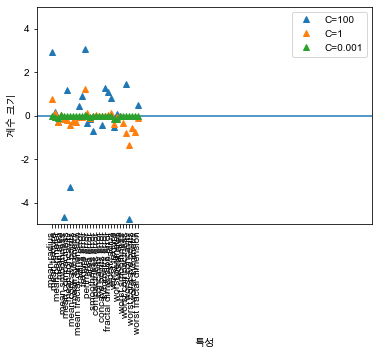

In [62]:
# 규제 매개변수 c를 각각 세 가지로 다르게 했을 때 모델의 계수?
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, '^', label="C=1")
plt.plot(logreg001.coef_.T, '^', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

# >>> 규제를 강하게 할수록 계수들이 0에 더 가까워 지지만, 완전 0 이되지는 x.

C=0.001인  l1 로지스틱 회귀의 훈련 정확도: 0.95
C=0.001인  l1 로지스틱 회귀의 훈련 정확도: 0.94
C=1.000인  l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인  l1 로지스틱 회귀의 훈련 정확도: 0.96
C=100.000인  l1 로지스틱 회귀의 훈련 정확도: 0.98
C=100.000인  l1 로지스틱 회귀의 훈련 정확도: 0.97


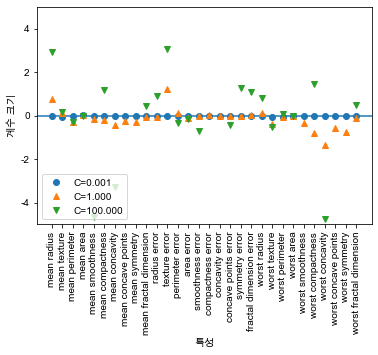

In [63]:
# 더 이해가 쉬운 모델 원해?
# L1 규제 사용해보자
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l2", solver='lbfgs', max_iter=10000).fit(X_train, y_train)
    print("C={:.3f}인  l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인  l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()

plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

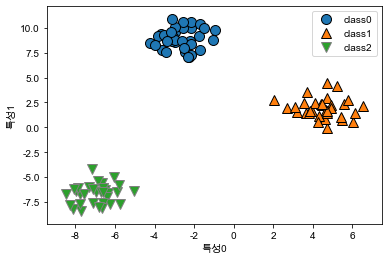

In [64]:
# 다중 클래스 분류용 선형 모델
# 로지스틱 회귀만 제외, 많은 선형 분류 모델들은 이진 분류만을 지원.
# 일대다 방법 : 이진 분류 알고리즘 -> 다중 클래스 분류 알고리즘으로 확장
#            각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습
#            가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택

# 각 클래스가 계수 벡터(w)와 절편(b)을 하나씩 갖게된다.

# 세 개의 클래스를 가진 데이터셋에 일대다 방식 적용.
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(["class0", "class1", "class2"])

In [65]:
# Linearsvc 분류기 훈련하기
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
# coef_ 행 : 세개의 클래스에 각각 대응하는 계수 벡터
print("절편 배열의 크기: ", linear_svm.intercept_.shape)
# intercept_ : 각 클래스의 절편을 담은 1차원 벡터

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

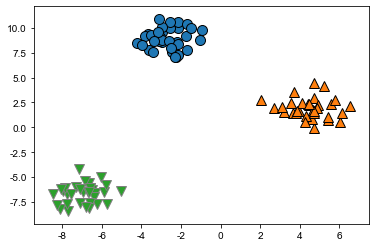

In [66]:
# 세 개의 이진 분류기의 경계 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(['클래스0', '클래스1', '클래스2', '클래스0경계', '클래스1경계', '클래스2경계'], loc=(1.01, 0.3))

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

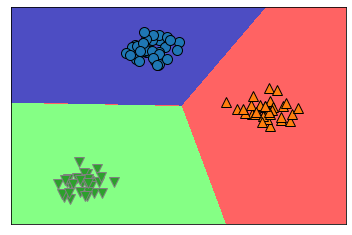

In [67]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성0")
plt.ylabel("특성1")
plt.legend(['클래스0', '클래스1', '클래스2', '클래스0경계', '클래스1경계', '클래스2경계'], loc=(1.01, 0.3))

In [68]:
# 선형모델
#  주요 매개변수 : 회귀는 alpha
#  LinearSVC & LogisticRegression : C
#  alpha 클수록/c값이 작을수록 -> 모델 단순
#  중요한 특성이 많지 않다고 생각하면 L1 규제 사용.

# 선형모델은 학습 속도가 빠르고, 예측도 빠르다.
# 매우 큰 데이터셋, 희소데이터셋에 잘 작동.

# 대용량 데이터셋이라면, 기본 설정에 solver='sag' 옵션을 줘서 빨리 처리하도록 만든다.
# 샘플에 비해 특성이 많을 떄 잘 작동.

In [69]:
# 나이브 베이즈 분류기
# : 선형모델과 매우 유사. 
#  LinearSVC & LogisticRegression 보다 속도가 빠르지만, 일반화 성능이 조금 뒤짐.

# 각 특성을 개별로 취급, 파라미트 학습 후 클래스별 통계를 단순하게 취합한다.

# GaussianNB (연속적인 데이터 적용 가능.)
# BernoulliNB (이진 데이터) : 텍스트 데이터 분류
# MultinomialNB (카운트 데이터: 문장에 나타난 단어의 횟수) : 텍스트 데이터 분류

X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

# 클래스 별로 0이 아닌 원소를 세는 과정
counts = {}

for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
    
print("특성 카운트: ", counts)

# GaussianNB : 클래스별로 특성의 평균 계산
# BernoulliNB : 클래스별로 각 특성의 표준편차 & 평균 저장
# MultinomialNB : coef_ 는 기울기w가 아니기 때문에 선형 모델과는 의미 다름.

# >>> 훈련과 예측 속도가 빠르고 과정 또한 이해가 쉽다.
# >>> 희소한 고차원 데이터셋에서 잘 작동
# >>> 매개변수에 민감하지 않.
# >>> 선형 모델로는 학습시간이 너무 오래 걸리는 엄~청 큰 데이터셋에 사용해보자.

특성 카운트:  {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [70]:
# 결정 트리
# decision tree
# : 분류와 회귀 문제에 널리 사용하는 모델
# 예/아니오 질문을 하면서 학습.

# 각 질문이나 정답을 담은 네모 상자 : 노드
# 마지막 노드 : 리프(잎)
# 에지 : 질문의 답과 다음 질문을 연결
# 맨 위 노드 : 루트 노드(전체 데이터셋)

# >>> 결정트리를 학습한다는 것 -> 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 것.
# >>> 위의 질문들을 테스트라고 한다. (!= 테스트 세트)
# >>> 각 테스트는 하나의 축을 따라 데이터를 둘로 나누는 것

# 나눠진 영역은 항상 축에 평행.

# 계층적으로 영역을 분할해가는 알고리즘

# 회귀 문제에도 트리 사용 가능.
# 새로운 데이터 포인트에 해당되는 리프노드를 찾는 과정
# 출력 : 찾은 리프 노드의 훈련 데이터 평균값


# 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 -> 모델 매우 복잡 -> 과대적합
# 순수 노드 : 타깃 하나로만 이뤄진 리프 노드
# (데이터 분할은 각 분할 영역이 한개의 타깃값을 가질때 까지 반복)

# 과대적합을 막는 두 가지
# 1) 사전 가지치기 : 트리 생성을 일찍 중단
#                 트리의 최대 깊이나 리프의 최대 개수를 제한 또는 노드 분할 위한 포인트의 최소 개수 지정
#                 scikit-learn은 사전 가지치기만 지원
# 2) 사후 가지치기(가지치기) : 트리 생성 후 데이터 포인트가 적은 노드를 삭제/병합

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
# >>> 모든 리프가 순수노드 -> 훈련세트 정확도 100%
# >>> 트리가 훈련 데이터의 모든 레이블을 기억 -> 충분히 깊게 만들어짐.

# 결정 트리의 깊이를 제한 않 -> 트리는 무한정 자라서 깊어지고 복잡해짐.

# 가지치기 안 한 트리 : 과대적합되기 쉬움. 잘 일반화 안 됨.


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [71]:
# 사전 가지치기로 트리 성장을 막아보자
# (트리가 완전히 성장하기 전에)
# 과대적합을 줄이기 위해.

# max_depth=4
# 연속 질문을 최대 4개로 제한
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))
# >>> 훈련 세트의 정확도는 떨, but, 테스트 세트의 성능은 개선.

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [72]:
# 트리 시각화
# export_graphviz()
# .dot 파일 만듦
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

Text(0, 0.5, '가격 ($/Mbyte)')

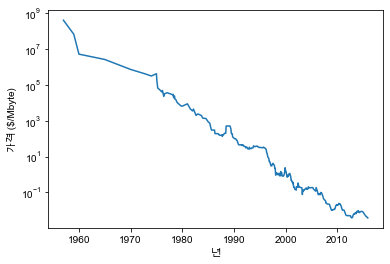

In [73]:
# 특성 중요도
# : 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 속성
#   0~1 사이
#   0 : 특성이 전혀 사용되지 않음.
#   1 : 완벽하게 타깃 클래스를 예측했다.
# 특성 중요도의 전체 합 = 1
# 특성 중요도는 항상 양수.

# 회귀 결정 트리에서도 비슷하게 적용. >>> DecisionTreeRegressor는 외삽이 없다.
# 훈련 데이터 범위 밖의 포인트에 대해 예측 불가능.

# 해당년도의 램 1메가 당 가격
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

In [74]:
# 날짜 특성으로 2000년 후의 가격 예측
# 지수 함수 적용
# (로그 스케일을 되돌리기 위해)
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]

# 로그 스케일로 바꾸기(관계를 간단하게 만들기 위해)
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측 값의 로그 스케일 되돌리기
# 지수함수로
# np.exp()
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# >>> 트리모델은 선형모델보다 완벽하게 예측하지만,
# >>> 훈련 데이터 밖의 새로운 데이터를 예측할 능력은 없다.(단)
# >>> 사전 가지치기를 사용해도 과대적합되기도 한다. (일반화 성능이 그리 좋지 않다) 

<ipython-input-74-5a3ea92ff4ec>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-74-5a3ea92ff4ec>:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


In [75]:
# 앙상블
# : 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

# 랜덤 포레스트 결정 트리
# 그레이디언트 부스팅 결정 트리

# 랜덤 포레스트
# 과대적합되는 결정 트리 문제를 회피하는 방법
# : 조금씩 다른 여러 결정 트리의 묶음
# 트리들이 달라지도록 트리 생성 시 무작위성을 주입.
# 트리를 랜덤하게 만드는 법 : 데이터 포인트 무작위 선택 / 분할 테스트에서 특성을 무작위로 선택하는 방법

# 랜덤 포레스트 구축
# 생성할 트리의 개수를 정해야 한다.
# 부트스트랩 샘플 생성 - 데이터셋으로 결정 트리 생성 - 알고리즘이 각 노드에서 후보 특성을 무작위 선택해 최선의 테스트 발견
# max_features = n_features >>> 트리의 각 분기에서 모든 특성 고려 (무작위성 배제 but, 부트스트랩 샘플링으로 인한 무작위성은 그대로)
# max_features = 1 >>> 트리의 분기는 테스트할 특성 고를 필요 없고, 임계값만 찾으면 됨.

# 랜덤 포레스트 분류 : 약한 투표 전략(간접적인 예측 : 예측한 확률을 평균내서 가장 높은 확률을 가진 클래스가 예측값)
# 랜덤 포레스트 회귀 : 모든 트리의 예측을 만들어서 평균내서 최종 예측을 생성.
# two_moon
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

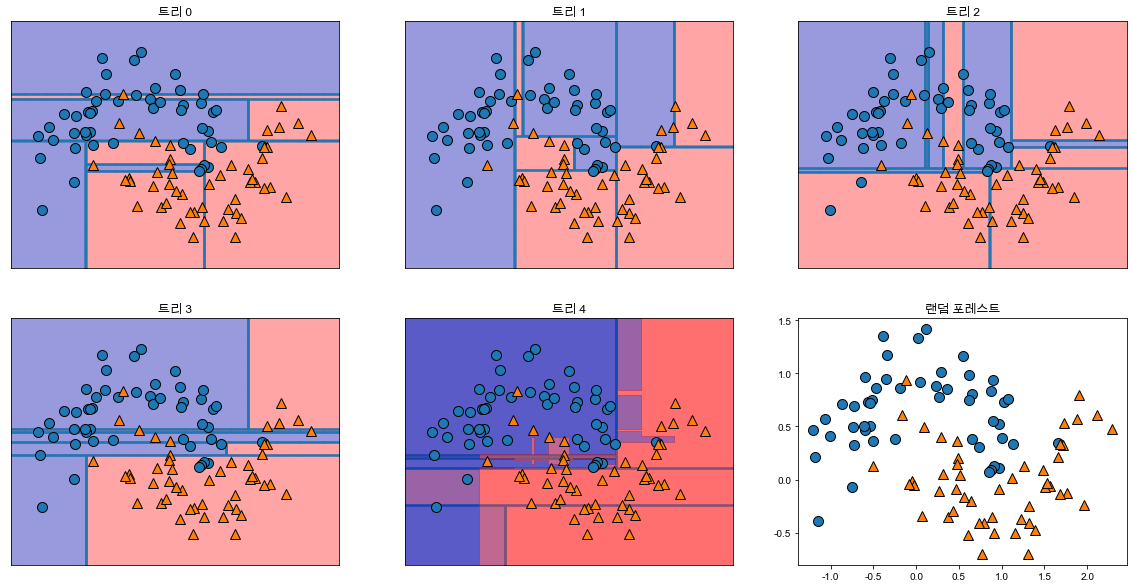

In [76]:
# 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, 1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# >>> 개개의 트리보다는 덜 과대적합되고 더 좋은 결정 경계를 만듦
# 매우 많은 트리 사용 > 부드러운 결정 경계

In [77]:
# 유방암 데이터셋
# 100개의 트리
# 랜덤 포레스트
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 별다른 매개변수 튜닝 없이도 높은 정확도를 낸다.
# 랜덤 포레스트의 특성 중요도 : 각 트리의 특성 중요도를 취합해 계산한 것.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [78]:
# 그레이디언트 부스팅 회귀 트리
# 이름이 회귀지만, 분류/회귀에 모두 사용 가능.
# 무작위성x. 순차적으로 트리를 만듦. >>> 대신 강력한 사전 가지치기 사용.
# 보통 1~5 깊지 않은 트리 사용. 메모리 적게 사용&예측도 빠름.
# 약한 학습기
# 랜포보다 매개변수 설정에 좀 더 민감하지만, 잘 조정하면 더 높은 정확도 제공.

# 이전 트리의 오차를 얼마나 강하게 보정할 것인지 제어하는 매개변수
# learning_rate
# 학습률 크면 > 트리는 보정 강하게 > 복잡한 모델을 만듦

# 기본값인 깊이가 3, 트리 100개, 학습률 0.1
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
# 훈련 세트 정확도: 100% >>> 과대적합

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


Text(0, 0.5, '특성 1')

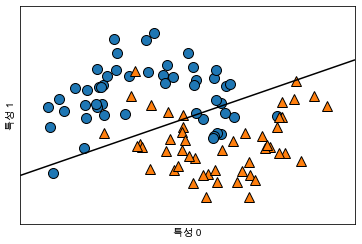

In [79]:
# 커널 서포트 벡터 머신
# SVM
# 회귀, 분류 모두 사용 가능.
# 3차원 산점도로 표현

from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성1 ** 2')

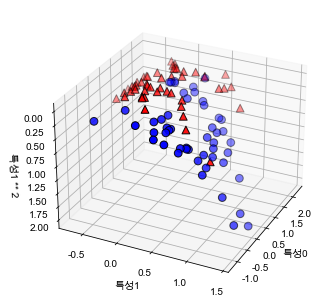

In [80]:
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
          marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0.5, 0, '특성1 ** 2')

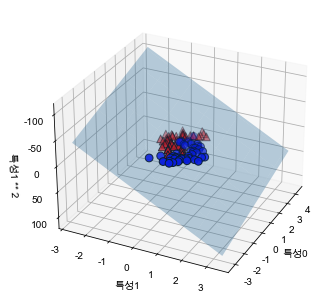

In [81]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
          marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성1')

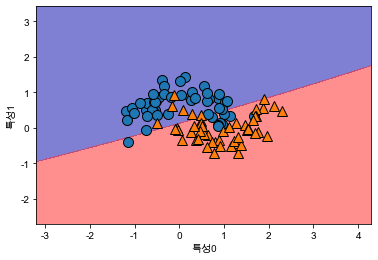

In [82]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")

In [83]:
# 커널 기법 : 데이터를 확장하지 않고 특성에 대한 데이터 포인트들의 거리를 계산하는 것.
# 서포트 벡터 머신에서 데이터를 고차원 공간에 매핑하는 데 많이 사용하는 방벙
# : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산하는 다항식 커널
#   가우시안 커널 (차원이 무한한 특성 공간에 매핑하는 것)
# >>> 특성의 중요도는 고차항이 될수록 줄어든다.

Text(0, 0.5, '특성1')

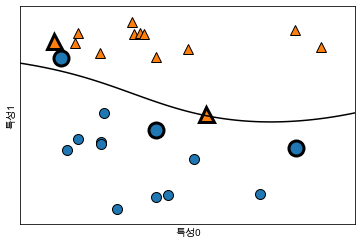

In [84]:
# SVM 이해하기
# 서포트 벡터 : 두 클래스 사이의 경계에 위치한 데이터 포인트들
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성0")
plt.ylabel("특성1")

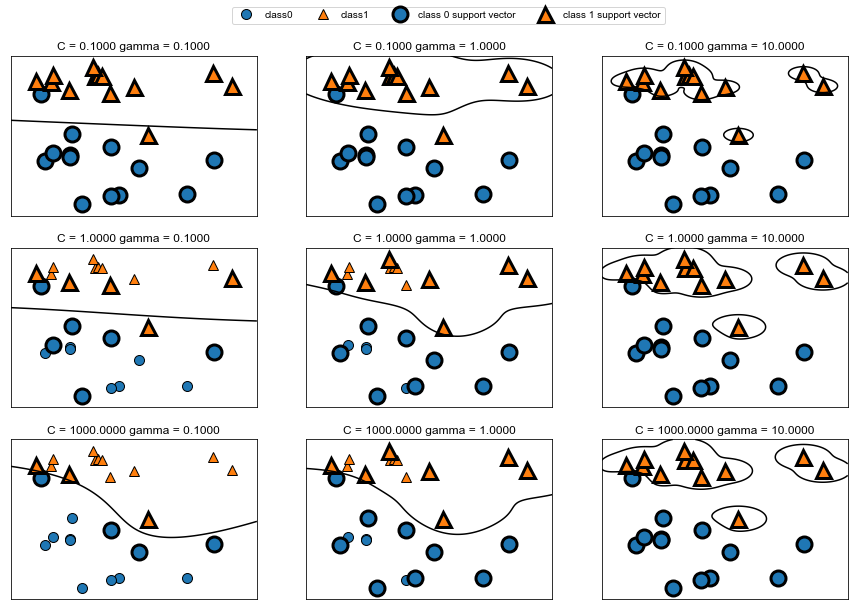

In [85]:
# svm 매개변수 튜닝
# gamma, c 매개변수
# gamma : 하나의 훈련 샘플이 미치는 영향의 범위 결절
# c : 규제 매개변수
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
    
axes[0,0].legend(["class0", "class1", "class 0 support vector", "class 1 support vector"], ncol=4, loc=(.9, 1.2))

# >>> 작은 gamma 값은 가우시안 커널의 반경을 크게 하여, 많은 포인트들이 가까이 있는 것으로 그려짐.
# >>> 큰 gamma 값 : 더 복잡한 모델 만듦
# >>> c를 증가 : 결정 경계를 휘어서 정확하게 분류함.


In [87]:
# 유방암 데이터셋에 적용
# c=1
# gamma=1/n_features (기본값 : auto)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


Text(0, 0.5, '특성 크기')

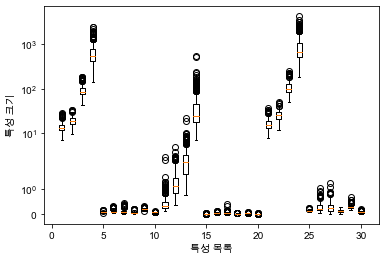

In [89]:
# 시각화
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [97]:
# svm 전처리
# 특성 값의 범위가 비슷해지도록 조정해야.
# 모든 특성 값을 평균이0, 단위분산 / 0~1로 맞추는 방법
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))
# 0~1 사이.


X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))
# >>> 비슷 -> 과소적합
# >>> gamma 값을 증가시켜 더 복잡한 모델을 만들자.

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [100]:
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))
# >>> 훈련세트 정확도는 높, 테스트는 왜 그대로?

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [101]:
# 10,000개의 샘플 정도면 svm모델 잘 작동.
# 중요한 매개변수는 규제 매개변수 c, 그리고 각 커널에 따른 매개변수도 중요!

Text(0, 0.5, 'relu(x), tanh(x)')

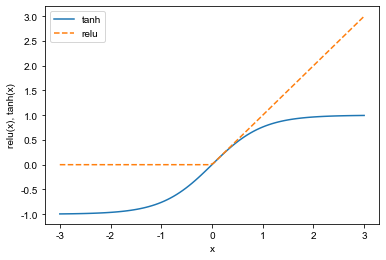

In [103]:
# 신경망(딥러닝)
# 다층 퍼셉트론(분류&회귀 둘 다 사용 가능)
# 신경망 모델MLP
# : 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습

# 왼쪽 노드 : 입력 특성
# 연결선 : 학습된 계수
# 오늘쪽 노드 : 출력(입력의 가중치 합)

# MLP에서 가중치 합을 만드는 과정이 여러번 반복 
# 중간 단계를 구성하는 은닉 유닛
# 계수는 각 입력과 은닉 유닛 사이, 은닉 유닛과 출력 사이마다 있.
# 선형 모델보다 강력하게 만들기 위해 : 렐루(비선형함수) / 하이퍼볼릭 탄젠트 적용해야.

# 렐루 함수 : 0이하 자르기
# 탄젠트 함수 : 낮은 입력값 -> -1 수렴 / 큰 입력값 -> +1 수렴

# >>> 비선형 함수를 이용해 선형 모델보다 훨씬 복잡한 함수를 학습 가능.
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

# 중요한 매개변수는 은닉층의 유닛 개수
# 소규모: 10개 정도, 복잡한 데이터셋: 10,000개가 될 수도.
# 은닉층은 추가도 가능.

Text(0, 0.5, '특성0')

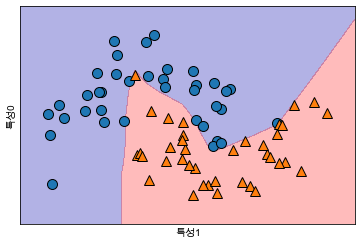

In [106]:
# >>> 많은 은닉층으로 구성된 대규모의 신경망이 생기는데 이를 딥러닝이라 한다.
# 신경망 튜닝
# two_moons
# 은닉 유닛 100개인 신경망으로 학습시킨 결정 경계
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성1")
plt.ylabel("특성0")

Text(0, 0.5, '특성1')

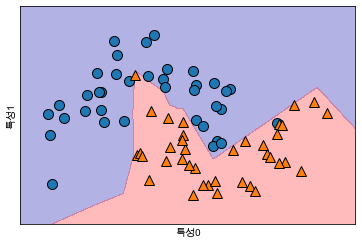

In [107]:
# 은닉 개수를 줄여도 여전히 좋은 결과를 얻을 수 있다.
# 은닉 유닛=10
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                   hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, '특성1')

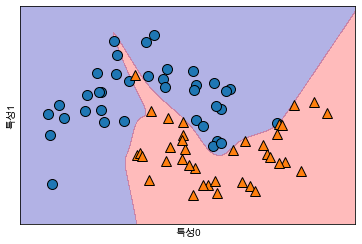

In [108]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                   random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성0")
plt.ylabel("특성1")

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


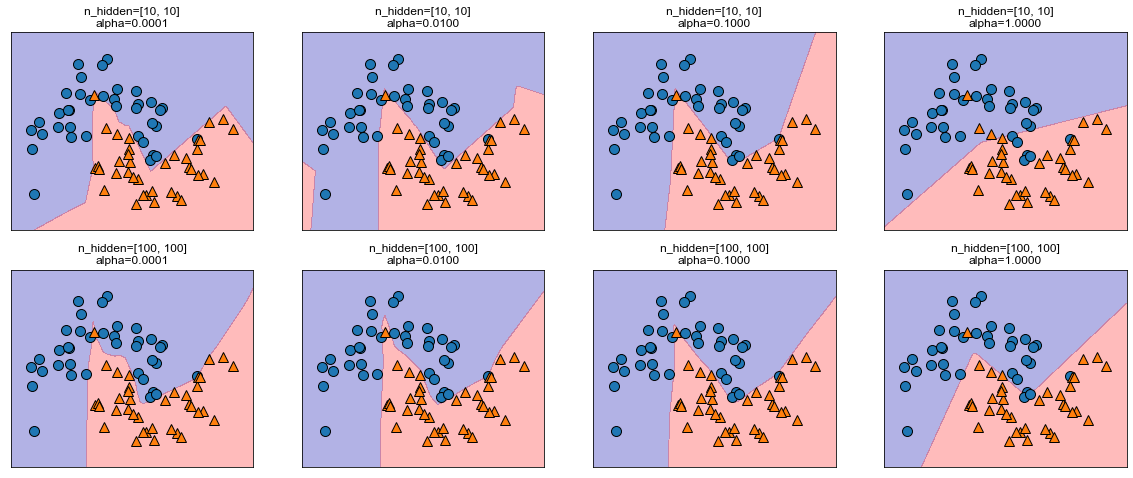

In [109]:
# 가중치를 0에 가깝게 감소 > 모델 복잡도 제어
# alpha 매개변수가 그 역할을 하고, 기본값은 매우 낮게 되어있음.
# 유닛이 각각 10, 100개이고 은닉층 2개를 사용했을 때 다른 알파값이 미치는 영향
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha))

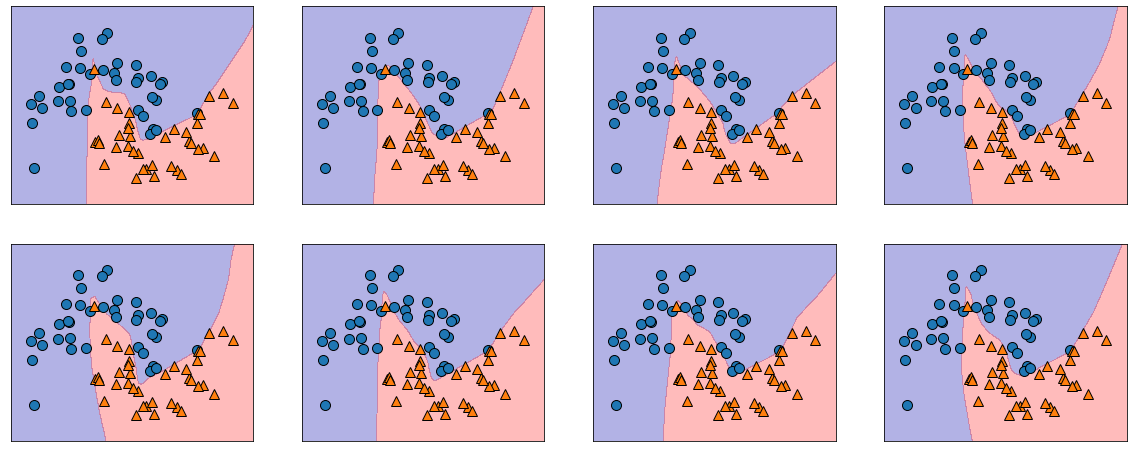

In [110]:
# 같은 매개변수를 가졌지만 초기화를 다르게 한다면?
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

# >>> 결정경계가 다 다르다.

In [111]:
# 유방암 데이터셋
# MLPClassifier 적용
# 매개변수는 기본값(매우 낮게 설정)
print("유방암 데이터의 특성별 최댓값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("test 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))
# >>> 정확도는 꽤 높다. 하지만 다른 모델만큼은 아니고,
# >>> 신경망 또한 모든 입력 특성을 평균0, 분산1로 조정하는것이 좋다.

훈련 세트 정확도: 0.94
test 세트 정확도: 0.92


In [114]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고, 표준편차로 나누면 >>> 평균0, 분산1 데이터로 변환됨.
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

# warining
# : Maximum iterations (200) reached and the optimization hasn't converged yet.warnings.warn(
# >>> 반복 횟수를 늘려야한다. ( 최대 반복횟수에 도달했습니다.)


훈련 세트 정확도: 0.991
test 세트 정확도: 0.965


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [115]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
# test세트 정확도 좋지만, 일반화 성능을 올리기히 위해 모델의 복잡도를 낮춰보자.

훈련 세트 정확도: 1.000
test 세트 정확도: 0.972


In [116]:
# alpha = 1 (0.0001 -> 1) >>> 아주 크게 증가
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("test 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
# good!

훈련 세트 정확도: 0.988
test 세트 정확도: 0.972


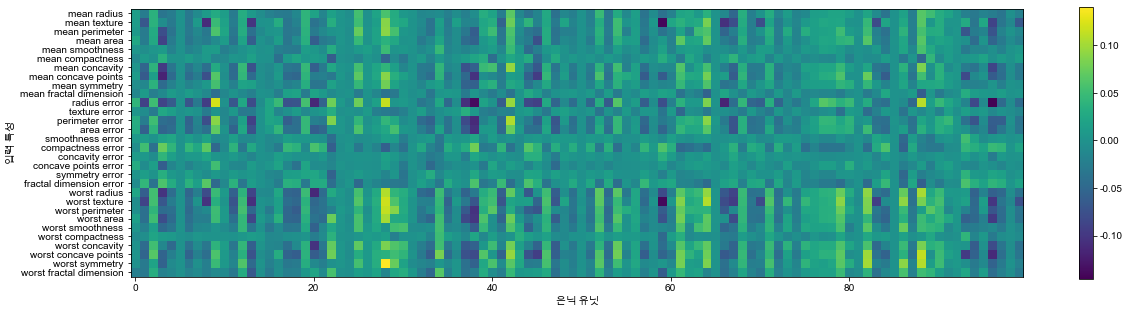

In [117]:
# 행은 30개의 입력 특성, 열은 100개의 은닉 유닛
# 밝은 색 : 큰 양수 값, 어두운 색 : 음수 값
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()
# >>> 모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다.


In [118]:
# 신경망은 대량의 데이터에 내재된 정보를 잡아내고, 매우 복잡한 모델을 만들 수 있.
# 충분한 시간&데이터, 매개변수 세심하게 조정 >>> 대단한 머신러닝 알고리즘!
# but, 너무 오래걸림. >>> 데이터 전처리에 주의!
# 신경망 매개변수 튜닝은 예술에 가까운 일 ㅠ

# 가장 중요한 매개변수
# 은닉층의 개수
# 은닉층의 유닛 수
# 먼저 과대적합될만한 충분히 큰 모델을 생성 - 충분히 학습될 수 있다고 생각될 때 신경만 구조를 줄/규제강화를 위해 알파값 증가 > 일반화 성능 향상 시킴
# solver 매개변수 : 모델 학습 방법 / 매개변수 학습에 사용하는 알고리즘 지정 가능.
# 평균0, 분산1로 조정.


In [123]:
# 분류기에 예측의 불확실성을 추가하는 기능
# 거짓 양성 : 거짓인데, 참을 
# 거짓 음성 : 참인데 거짓을

# decision_function
# predict_proba

# GradientBoostingClassifier분류기의 decision_function & predict_proba
# 에서 메서드의 역할
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [124]:
print("X_test.shape: ", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

X_test.shape:  (25, 2)
결정 함수 결과 형태: (25,)


In [125]:
print("결정 함수:\n", gbrt.decision_function(X_test)[:6])
# +는 양성 클래스, -는 음성 클래스

결정 함수:
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [127]:
print("임계치와 결정 함수 결과 비교:\n", gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))
# +, 양성 클래스, True
# -, 음성 클래스, False

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


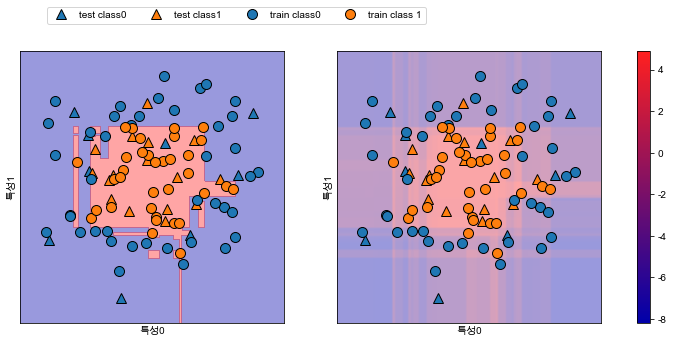

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                               fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                           alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["test class0", "test class1", "train class0", "train class 1"], ncol=4, loc=(.1, 1.1))
# >>> 두 클래스 사이의 경계를 구분하기 어려움.

In [132]:
# 다중분류에서의 불확실성
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [133]:
# 가장 큰 값을 찾아 예측 결과 재현
print("가장 큰 결정 함수의 인덱스:\n", np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [137]:
# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수 인덱스:", argmax_dec_func[:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수 인덱스: [1 0 2 1 1 0 1 2 1 1]


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
# 모델 평가와 성능 향상
# 지도학습인 회귀&분류만

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋 생성
X, y = make_blobs(random_state=0)

# 데이터&타깃 레이블을 훈련세트/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
# >>> 이전에 본 적 없는 새로운 데이터에도 모델이 잘 일반화 되는지 보려고!

# 모델 객체 생성 및 훈련 세트로 학습
logreg = LogisticRegression().fit(X_train, y_train)

# 모델 평가
# 테스트 세트
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


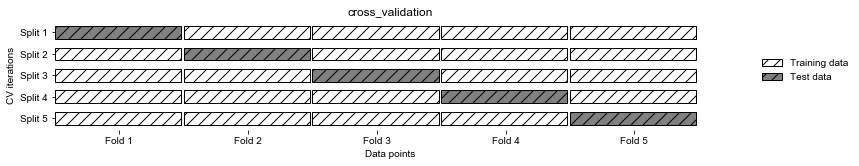

In [140]:
# 교차 검증
# : 안정적인 일반화 성능 측정 방법
#   데이터를 여러 번 반복해서 나누고, 여러 모델을 학습(훈련데이터/테스트데이터 -> x)

# k-겹 교차겁증
# : k는 특정 숫자, 보통 5/10 사용.
# 폴드 : 비슷한 크기의 부분집합

# 5-겹 교차검증 순서
# 5개 폴드 생성 -> 첫번째 모델 : 폴드1을 테스트 세트/폴드2,3,4,5를 훈련세트
#               두번째 모델 : 폴드2를 테스트 세트/폴드1,3,4,5를 훈련세트
#               세번째 모델 : 폴드3을 테스트 세트/폴드1,2,4,5를 훈련세트
#               네번째 모델 : 폴드4를 테스트 세트/폴드1,2,3,5를 훈련세트
#              다섯번째 모델 : 폴드5를 테스트 세트/폴드1,2,3,4를 훈련세트
# >>> 이렇게 반복하고 다섯번의 분할마다 정확도를 측정하여 >>> 결국 다섯개의 정확도 값을 얻는다.
# >>> 평균을 냄
mglearn.plots.plot_cross_validation()
# >>> 첫번째 1/5조각 : 폴드1 ... 다섯번째조각이 폴드5

In [176]:
# 교차 검증 : cross_val_score()

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)

print("교차 검증 점수:", scores)
# 기본 값은 5-겹 교차 검증

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


In [178]:
# cross_validate()
# 분할마다 훈련과 테스트에 걸린 시간을 담은 딕셔너리를 반환
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
display(res)

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'fit_time': array([0.02725101, 0.01808   , 0.01385689, 0.0154233 , 0.01274228]),
 'score_time': array([0.00029397, 0.00033188, 0.00021315, 0.00015688, 0.00011706]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [179]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

# 교차 검증 사용하면,
# 테스트 세트에 각 샘플이 정확하게 한번씩 들어간다. 
# 각 폴드는 한 번씩 테스트세트가 되기 때문에, 교차검증의 점수(평균값)를 높이기 위해 -> 모든 샘플이 잘 일반화 되어야 한다.
# 데이터 여러 개로 나누면, 훈련 데이터에 얼마나 민감한지 알 수 있다.
# 5-겹 : 80%의 데이터를 모델학습에 사용.
# 10-겹 : 90%를 모델학습에 사용.

# 단, 연ㅇ산 비용이 늘어난다.
# 또한 k배 정도 느리다.

,fit_time,score_time,test_score,train_score
0,0.027251,0.000294,0.966667,0.966667
1,0.018080,0.000332,1.000000,0.966667
2,0.013857,0.000213,0.933333,0.983333
3,0.015423,0.000157,0.966667,0.983333
4,0.012742,0.000117,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.017471
score_time     0.000223
test_score     0.973333
train_score    0.975000
dtype: float64


In [180]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Iris 레이블:\n", iris.target)
# >>> 데이터가 순서대로 0,1,2가 있기 때문에 테스트세트를 나누면 정확도는 0이된다.

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


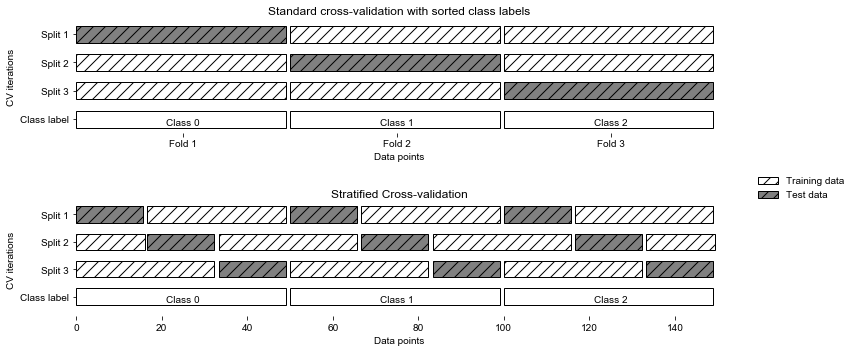

In [181]:
# 계층별 k-겹 교차 검증
# 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눈다.
mglearn.plots.plot_stratified_cross_validation()
# >>> 기본 k-겹 교차검증보다 안정적.

In [182]:
# 교차 검증 상세 옵션
# scikit-learn에서는 cv매개변수에 교차검즐분할기를 전달 > 더 세밀하게 제어 가능

# 회귀 : k-겹 교차 검증
# 분류 : 계층별 k-겹 교차 검증의 기본값이 잘 작동.

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("교차검증점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차검증점수:
 [1.         1.         0.86666667 0.93333333 0.83333333]


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [183]:
kfold = KFold(n_splits=3)
print("교차검증점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))
# >>> [0. 0. 0.] : 아무것도 학습 불가.
# >>> 해결하려면 데이터를 섞어야한다.
# KFold 의 shuffle=True
# but, 데이터 분할 전에 섞어주면 좋기 때문에 -> random_state=0도 사용.

교차검증점수:
 [0. 0. 0.]


In [184]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차검증점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차검증점수:
 [0.98 0.96 0.96]


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [185]:
# LOOCV
# 또 다른 교차검증 방법
# : 폴드 하나에 샘플 하나만 들어있는 k-겹 교차 검증 같은 것.
#   각 반복에서 하나의 데이터 포인트를 선택하여 테스트 세트로 사용.
#   작은 데이터 셋에서 가끔 좋은 결과를 만들기도.
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수:", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

교차 검증 분할 횟수: 150
평균 정확도: 0.97


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


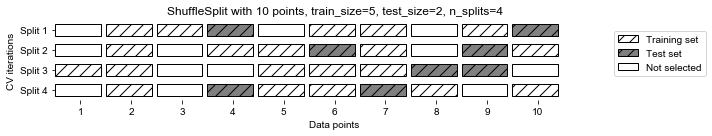

In [186]:
# 임의 분할 교차 검증
# train_size 만큼 포인트로 훈련 세트 생성, test_size만큼 테스트 세트를 만들도록 분할.
# n_split 횟수만큼 반복.
mglearn.plots.plot_shuffle_split()
# 샘플10개인 데이터셋, 5개 포인트의 훈련 세트, 2개 포인트의 테스트세트로 4번 반복해 나눈 것.

In [188]:
# 데이터셋의 50%를 훈련 세트, 50%를 테스트 세트로 10번 반복 분할
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)
print(scores.mean())

교차 검증 점수:
 [0.98666667 0.98666667 0.96       0.96       0.97333333 0.94666667
 0.94666667 0.98666667 0.98666667 0.97333333]
0.9706666666666667


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [189]:
# 그룹별 교차 검증
# 데이터 안에 매우 연관된 그룹이 있을 때도 교차 검증을 사용.
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0, 1,1,1,1, 2,2, 3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)
# >>> 처음 3개 샘플: 그룹1, 다음 4개 샘플: 그룹2

교차 검증 점수:
 [0.75       0.6        0.66666667]


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [190]:
# iris 데이터셋에 적용하기
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

In [191]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print("교차 검증 점수:\n", scores)
print("교차 검증 평균 점수:{:.3f}".format(scores.mean()))

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

교차 검증 점수:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수:0.965


/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [193]:
# 그리드 서치
# : 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도해 보는 것.
# 매개변수를 튜닝하여 일반화 성능 개선하기

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("훈련 세트의 트기: {} 테스트 세트의 크기: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

# gamma & C 매개변수의 조합 보기
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

print("최고 점수: {:.2f}".format(best_score))
print("최적 매개변수:", best_parameters)
# >>> 97% : 매우 낙관적인 것일 수도 >>> 매개변수 조정을 위해 테스트 세트를 이미 사용했기 때문에, 재사용할 수 없.
# >>> 평가를 위해서는 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요.

훈련 세트의 트기: 112 테스트 세트의 크기: 38
최고 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.001}


In [196]:
from sklearn.svm import SVC

# 데이터를 훈련+검증 세트 / 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# 훈련 세트를 훈련 / 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기:{} 테스트 세트의 크기{}".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
        
# 훈련세트+검증세트 합쳐서 모델을 재생성
# 테스트 세트로 평가
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("검증 세트에서 최고 점수:{:.2f}".format(best_score))
print("최적 매개 변수: ".format(best_parameters))
print("검증 매개변수에서 테스트 세트 점수:{:.2f}".format(test_score))
# >>> 92% : 새로운 데이터에 대해 92%만 분류한다.

# >>> 최종 평가에만 사용하도록 테스트 세트를 분리해 유지하는 것이 중요!
# >>> 마지막 평가를 위해 테스트 세트를 보관하는 것이 좋다.

훈련 세트의 크기:84 테스트 세트의 크기28
검증 세트에서 최고 점수:0.96
최적 매개 변수: 
검증 매개변수에서 테스트 세트 점수:0.92


In [198]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 svcgnsfus
        svm = SVC(gamma=gamma, C=C)
        
        # 교차 검증 적용
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        
        # 교차 검증 정확도의 편균 계산
        score = np.mean(scores)
        
        # 점수가 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
# 훈련 세트+검증 세트 합쳐서 모델 재생성
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

# >>> c=10, gamma=0.1 일때 일반화 최적화.

SVC(C=10, gamma=0.1)

In [199]:
# 매개변수 조합 딕셔너리로 생성
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

# 과대적합 방지를 위해 데이터 = 훈련세트/테스트세트
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

print("test set 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

test set 점수: 0.97


In [203]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

# score() != best_score_
# 테스트 세트로 score() 메서드에서 계산하는 모델의 일반화 성능 != 훈련 세트에서 수행한 교차 검증 평균 정확도 best_score_

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97


In [204]:
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=10, gamma=0.1)


In [207]:
import pandas as pd

pd.set_option('display.max_columns', None)

results = pd.DataFrame(grid_search.cv_results_)

display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00131989,0.000511408,0.000465393,0.000442696,0.000438595
std_fit_time,0.000603838,1.00532e-05,2.35477e-05,1.51229e-05,1.85799e-05
mean_score_time,0.000488997,0.000209951,0.000190973,0.000178719,0.00017581
std_score_time,0.000202961,1.11539e-05,9.92807e-06,7.04784e-06,6.65286e-06
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


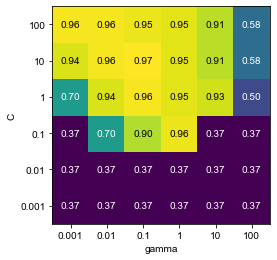

In [208]:
# 검색 대상 매개변수가 두 개(c, gamma)이므로 히트맵으로 보기 좋다.

scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

# >>> 높은 성능을 얻으려면 매개변수 조정이 중요하다.

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/kimminkyoung/opt/anaconda3/

/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/kimminkyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: gamma < 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/kimminkyoung/opt/anaconda3/

ValueError: gamma < 0

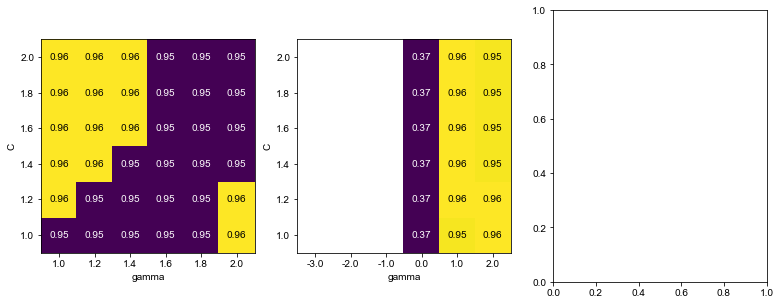

In [211]:
# 검색범위가 적절하게 선택되지 않아서 바람직하지 못한 결과를 내는 그래프
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C':np.linspace(1,2,6),
                    'gamma':np.linspace(1,2,6)}
param_grid_one_log = {'C':np.linspace(1,2,6),
                     'gamma':np.linspace(-3,2,6)}
param_grid_range = {'C':np.linspace(-3,2,6),
                     'gamma':np.linspace(-7,-2,6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                          param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    # hitmap
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap='viridis', ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

In [212]:
# 중첩 교차 검증 : 바깥쪽 루프에서 데이터를 훈련/테스트 세트로 나누는 것.
# 각 훈련 세트에 대해 그리드 서치 실행
# 특정 데이터셋에서 주어진 모델이 얼마나 잘 일반화되는지 평가하는데 유용한 방법

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                        iris.data, iris.target, cv=5)
print("교차 검증 점수:", scores)
print("교차 검증 평균 점수:", scores.mean())
print(param_grid)

교차 검증 점수: [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.9800000000000001
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
